In [1]:
using DataFrames
using Distributions: cquantile, TDist
using CSV
using Plots
using StatsPlots
using Statistics

include("ADA.jl")
using .ADA

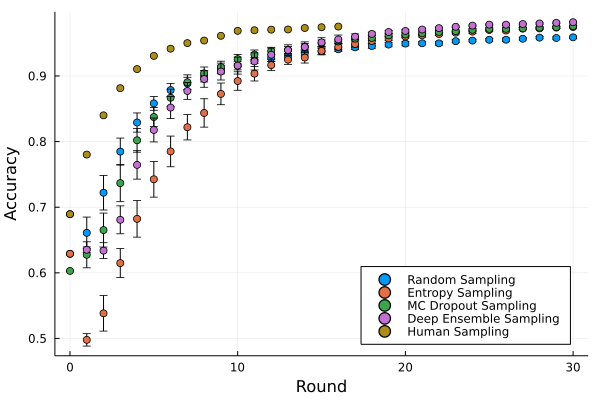

In [6]:
function process_csv(df)
    gdf = groupby(df, :round)
    acc_mean = combine(gdf, :accuracy => mean).accuracy_mean
    acc_std = combine(gdf, :accuracy => std).accuracy_std
    n = 30
    α = 0.01    # 99 % confidence interval
    t = cquantile(TDist(n - 1), α / 2)
    ci = t * (acc_std / sqrt(n))
    return acc_mean, ci
end

df_random = DataFrame(CSV.File("data/random.csv"))
df_entropy = DataFrame(CSV.File("data/entropy.csv"))
df_mcdropout = DataFrame(CSV.File("data/mcdropout.csv"))
df_ensemble = DataFrame(CSV.File("data/ensemble.csv"))

mean_random, ci_random = process_csv(df_random)
mean_entropy, ci_entropy = process_csv(df_entropy)
mean_mcdropout, ci_mcdropout = process_csv(df_mcdropout)
mean_ensemble, ci_ensemble = process_csv(df_ensemble)

scatter(0:30, mean_random, yerror=ci_random, label="Random Sampling",
    legend_position=:bottomright, xlabel="Round", ylabel="Accuracy")
scatter!(0:30, mean_entropy, yerror=ci_entropy, label="Entropy Sampling")
scatter!(0:30, mean_mcdropout, yerror=ci_mcdropout, label="MC Dropout Sampling")
scatter!(0:30, mean_ensemble, yerror=ci_ensemble, label="Deep Ensemble Sampling")

human = [mean_ensemble[1], 0.7802, 0.84, 0.8814, 0.9105, 0.9306, 0.9416, 0.9501, 0.954, 0.9612, 0.9688, 0.9697, 0.9706, 0.9709, 0.9731, 0.9743, 0.9753]
scatter!(0:length(human) - 1, human, label="Human Sampling")

In [3]:
mean_ensemble[end], mean_mcdropout[end], mean_entropy[end], mean_random[end]

(0.9813899999999999, 0.9759700000000001, 0.9746, 0.9589166666666665)

In [4]:
ci_ensemble[end], ci_mcdropout[end], ci_entropy[end], mean_random[end]

(0.0009594340346697372, 0.0010839542376132512, 0.0016521409396217598, 0.9589166666666665)

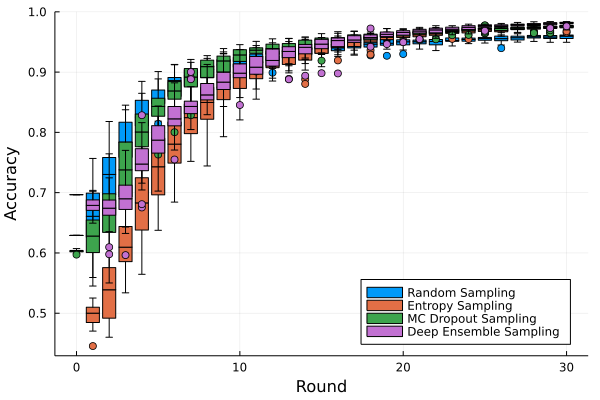

In [5]:
@df df_random boxplot(:round, :accuracy, label="Random Sampling",
    legend_position=:bottomright, xlabel="Round", ylabel="Accuracy")
@df df_entropy boxplot!(:round, :accuracy, label="Entropy Sampling")
@df df_mcdropout boxplot!(:round, :accuracy, label="MC Dropout Sampling")
@df df_ensemble boxplot!(:round, :accuracy, label="Deep Ensemble Sampling")